# INTRO

### DATA PREPARATION

![](./img/proj_workflow_dataprep.jpg)

### MODEL TRAINING

![](./img/proj_workflow_train_vl_model.png)

---

# ML TASKS

![](./img/machinelearning_supervisedunsupervised.png)

## SUPERVISED LEARNING
There are two types of supervised machine learning algorithms: 
- Regression: predicts continuous value outputs
- Classification: predicts discrete outputs

For instance, predicting the price of a house in dollars is a regression problem whereas predicting whether an image represents a cat or a dog is a classification problem.

---

### Linear Regression Theory
The term "linearity" in algebra refers to a linear relationship between two or more variables. If we draw this relationship in a two-dimensional space (between two variables), we get a straight line.

Linear regression performs the task to predict a dependent variable value (y) based on a given independent variable (x). So, this regression technique finds out a linear relationship between x (input) and y(output). Hence, the name is Linear Regression. If we plot the independent variable (x) on the x-axis and dependent variable (y) on the y-axis, linear regression gives us a straight line that best fits the data points.

![](./img/linR.png)

We know the equation of the above line is :

```
Y = mx + b
```

Where *b* is the intercept (constant) and *m* is the slope of the line.

![](./img/slopegraphlabel.jpg)

So basically, the linear regression algorithm gives us the most optimal value for the intercept and the slope (in two dimensions). 

The y and x variables remain the same, since they are the data features and cannot be changed. The values that we can control are the intercept(b) and slope(m). There can be multiple straight lines depending upon the values of intercept and slope. 

This same concept can be extended to cases where there are more than two variables. This is called multiple linear regression. For instance, consider a scenario where you have to predict the price of the house based upon its area, number of bedrooms, the average income of the people in the area, the age of the house, and so on. 
In this case, the dependent variable (target variable) is dependent upon several independent variables. 

A regression model involving multiple variables can be represented as:

```
y = b0 + m1b1 + m2b2 + m3b3 + ... mnbn
```

This is the equation of a hyperplane.

# Esercizio su regressione
Ispirato a: 
https://www.kdnuggets.com/2019/03/beginners-guide-linear-regression-python-scikit-learn.html


Dataset disponibile:
https://www.kaggle.com/smid80/weatherww2

## Context
While exploring the Aerial Bombing Operations of World War Two dataset (https://www.kaggle.com/usaf/world-war-ii), and recalling that the D-Day landings were nearly postponed due to poor weather, I sought out weather reports from the period to compare with missions in the bombing operations dataset.

_In the military, D-Day is the day on which a combat attack or operation is to be initiated._

## Content
The dataset contains information on weather conditions recorded on each day at various weather stations around the world. Information includes precipitation, snowfall, temperatures, wind speed and whether the day included thunder storms or other poor weather conditions.

## Acknowledgements
The data are taken from the United States National Oceanic and Atmospheric Administration (https://www.kaggle.com/noaa) National Centres for Environmental Information website: https://www.ncdc.noaa.gov/data-access/land-based-station-data/land-based-datasets/world-war-ii-era-data

Inspiration
This dataset is mostly to assist with the analysis of the Aerial Bombing Operations dataset, also hosted on Kaggle, that consists of digitized paper mission reports from WWII. Each record includes the date, conflict, geographic location, and other data elements to form a live-action sequence of air warfare from 1939 to 1945. The records include U.S. and Royal Air Force data, in addition to some Australian, New Zealand and South African air force missions.

### TASK
Our task is to predict the maximum temperature taking input feature as minimum temperature.

DATA: 

| FEATURES | DESCRIPTION |
| --- | --- |
| STA | Weather Station |
| Date | Self-explanatory |
| Precip | Precipitation in mm |
| WindGustSpd | Peak wind gust speed in km/h |
| MaxTemp | Maximum temperature in degrees Celsius |
| MinTemp | Minimum temperature in degrees Celsius |
| MeanTemp | Mean temperature in degrees Celsius |
| Snowfall | Snowfall and Ice Pellets in mm |
| PoorWeather | A repeat of the TSHDSBRSGF column |
| YR | Year of Observation |
| MO | Month of Observation |
| DA | Day of Observation |
| PRCP | Precipitation in Inches and Hundredths |
| DR | Peak wind gust direction in tens of degrees |
| SPD | Peak wind gust speed in knots |
| MAX | Maximum temperature in degrees Fahrenheit |
| MIN | Minimum temperature in degrees Fahrenheit |
| MEA | Mean temperature in degrees Fahrenheit |
| SNF | Snowfall in inches and tenths |
| SND | Snow depth (includes ice pellets) recorded at 1200 GMT except 0000 GMT in Far East Asian Area in inches and tenths |
| FT | Frozen Ground Top (depth in inches) |
| FB | Frozen Ground Base (depth in inches) |
| FTI | Frozen Ground Thickness (thickness in inches) |
| ITH | Ice Thickness on Water (inches and tenths) |
| PGT | Peak wind gust time (hours and tenths) |
| TSHDSBRSGF | Day with: Thunder; Sleet; Hail; Dust or Sand; Smoke or Haze; Blowing Snow; Rain; Snow; Glaze; Fog; 0 = No, 1 = Yes |
| SD3 | Snow depth at 0030 GMT includes ice pellets in inches and tenths |
| RHX | 24-hour maximum relative humidity, as a whole percent |
| RHN | 24-hour minimum relative humidity, as a whole percent |
| RVG | River guage in feet and tenths |
| WTE | Water equivalent of snow and ice on ground in inches and hundredths |

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.options.display.max_columns = None

In [5]:
%matplotlib inline

In [6]:
# leggo file locations
loc_df = pd.read_csv("../data/Weather Station Locations.csv")
loc_df.head()

,WBAN,NAME,STATE/COUNTRY ID,LAT,LON,ELEV,Latitude,Longitude
0,33013,AIN EL,AL,3623N,00637E,611,36.383333,6.650000
1,33031,LA SENIA,AL,3537N,00037E,88,35.616667,0.583333
2,33023,MAISON BLANCHE,AL,3643N,00314E,23,36.716667,3.216667
3,33044,TELERGMA,AL,3607N,00621E,754,36.116667,6.416667
4,12001,TINDOUF,AL,2741N,00809W,443,27.683333,-8.083333


#### FETCH DATA

In [7]:
# leggo file dati
df = pd.read_csv('../data/Summary of Weather.csv')

D:\Users\feder\Miniconda3\envs\py39_pbg\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
df.shape

(119040, 31)

In [9]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,DR,SPD,MAX,MIN,MEA,SNF,SND,FT,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,7,1,0.04,NaN,NaN,78.0,72.0,75.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,7,2,0,NaN,NaN,84.0,71.0,78.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,7,3,0.1,NaN,NaN,79.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,7,4,0.1,NaN,NaN,80.0,72.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,7,5,0,NaN,NaN,80.0,71.0,76.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### CLEAN / STRUCTURE / PREPROCESS DATA

In [10]:
# controllo le colonne del dataframe (nulli e tipi)
cols_df = pd.DataFrame({
    "null_percentage": pd.isna(df).sum() / len(df) * 100,
    "dtype": df.dtypes
}).sort_values("null_percentage", ascending=False)
cols_df.head()

,null_percentage,dtype
WTE,100.0,float64
FT,100.0,float64
RVG,100.0,float64
FB,100.0,float64
RHN,100.0,float64


In [11]:
# tutte le colonne con % di valori nulli > 90 vengono eliminate
DROPPABLE_COLS = cols_df[cols_df["null_percentage"] > 90].index.tolist()

In [12]:
DROPPABLE_COLS

['WTE',
 'FT',
 'RVG',
 'FB',
 'RHN',
 'RHX',
 'SD3',
 'FTI',
 'ITH',
 'PGT',
 'SPD',
 'WindGustSpd',
 'DR',
 'SND']

In [13]:
len(DROPPABLE_COLS)

14

In [14]:
# elimino colonne nulle
df = df.drop(columns=DROPPABLE_COLS)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   MaxTemp      119040 non-null  float64
 4   MinTemp      119040 non-null  float64
 5   MeanTemp     119040 non-null  float64
 6   Snowfall     117877 non-null  object 
 7   PoorWeather  34237 non-null   object 
 8   YR           119040 non-null  int64  
 9   MO           119040 non-null  int64  
 10  DA           119040 non-null  int64  
 11  PRCP         117108 non-null  object 
 12  MAX          118566 non-null  float64
 13  MIN          118572 non-null  float64
 14  MEA          118542 non-null  float64
 15  SNF          117877 non-null  object 
 16  TSHDSBRSGF   34237 non-null   object 
dtypes: float64(6), int64(4), object(7)
memory usage: 15.4+ MB


In [16]:
# considero solo gli object e cerco di trasformarli in numeri
cols_df[cols_df["dtype"] == "object"]

,null_percentage,dtype
TSHDSBRSGF,71.239079,object
PoorWeather,71.239079,object
PRCP,1.622984,object
Snowfall,0.976983,object
SNF,0.976983,object
Date,0.000000,object
Precip,0.000000,object


In [17]:
# data -> formato datetime
df["Date"] = pd.to_datetime(df["Date"])

In [18]:
# Precip -> float 
df["Precip"].value_counts(dropna=False)

0          64267
T          16753
0.254       3389
0.508       2909
0.762       2015
           ...  
123.698        1
106.68         1
126.492        1
123.952        1
161.036        1
Name: Precip, Length: 540, dtype: int64

In [19]:
T = 0.01 
# https://en.wikipedia.org/wiki/Trace_(precipitation)

In [20]:
df["Precip"] = df["Precip"].replace("T", T).astype("float").fillna(0)

In [21]:
# questo dato va normalizzato e splittato su + colonne
df["TSHDSBRSGF"].value_counts(dropna=False)
# Thunder; Sleet; Hail; Dust or Sand; Smoke or Haze; Blowing Snow; Rain; Snow; Glaze; Fog;

NaN           84803
1             25846
1.0            6134
0               870
1     1         310
100000          263
1 1             133
1 1  1           96
1000             91
100001           62
1    1           56
101000           56
1000001000       52
1  1             49
1000001001       45
11               39
1100000          16
1001             16
1   1 1          14
101001           14
1000101001       13
1000101000        9
11 1              8
1000000           7
1000000000        6
1     1  1        5
11    1           5
1010001000        5
1010001001        2
1 0  1            2
1   1 1  1        2
1000100001        2
1101000           2
10001001          1
1     0           1
1000100000        1
1 0               1
1101001           1
1   1             1
1        1        1
Name: TSHDSBRSGF, dtype: int64

In [22]:
df["TSHDSBRSGF"].replace({
    1: "1",
    np.nan: "0"
}).value_counts(dropna=False)

0             85673
1             31980
1     1         310
100000          263
1 1             133
1 1  1           96
1000             91
100001           62
101000           56
1    1           56
1000001000       52
1  1             49
1000001001       45
11               39
1001             16
1100000          16
101001           14
1   1 1          14
1000101001       13
1000101000        9
11 1              8
1000000           7
1000000000        6
1010001000        5
11    1           5
1     1  1        5
1000100001        2
1010001001        2
1 0  1            2
1   1 1  1        2
1101000           2
10001001          1
1000100000        1
1     0           1
1        1        1
1 0               1
1101001           1
1   1             1
Name: TSHDSBRSGF, dtype: int64

In [23]:
df["TSHDSBRSGF"].replace({
    1: "1",
    np.nan: "0"
}).str.replace(" ", "0").apply(lambda x: '{:0<10}'.format(x)).value_counts(dropna=False)

0000000000    85673
1000000000    32349
1000001000      362
1010000000      189
1000010000      120
1010010000      110
1001000000       65
1100000000       55
1000001001       50
1000101000       23
1000101001       15
1101000000       10
1010001000        5
1100001000        5
1000100000        2
1000100001        2
1010001001        2
1000100100        1
1000000001        1
1101001000        1
Name: TSHDSBRSGF, dtype: int64

In [24]:
df["TSHDSBRSGF"] = df["TSHDSBRSGF"].replace({
    1: "1",
    np.nan: "0"
}).str.replace(" ", "0").apply(lambda x: '{:0<10}'.format(x))

In [25]:
colnames = [
    "Thunder", # Tuono
    "Sleet", # Nevischio
    "Hail", # grandine
    "Dust", # Polvere o sabbia
    "Smoke", # Fumo o foschia
    "Blowing_Snow", # Bufera di neve
    "Rain", # Pioggia
    "Snow", # Neve
    "Glaze", # Patina
    "Fog" # Nebbia
]

In [26]:
events_splitted_df = df["TSHDSBRSGF"].apply(lambda x: pd.Series(
    dict(zip(
        colnames, 
        list(str(x)))
        )
)).astype(np.uint8)

In [27]:
events_splitted_df.tail()

,Thunder,Sleet,Hail,Dust,Smoke,Blowing_Snow,Rain,Snow,Glaze,Fog
119035,0,0,0,0,0,0,0,0,0,0
119036,1,0,0,0,0,0,0,0,0,0
119037,1,0,0,0,0,0,0,0,0,0
119038,0,0,0,0,0,0,0,0,0,0
119039,0,0,0,0,0,0,0,0,0,0


In [28]:
df = pd.concat([df, events_splitted_df], axis=1)
df.head()

,STA,Date,Precip,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,MO,DA,PRCP,MAX,MIN,MEA,SNF,TSHDSBRSGF,Thunder,Sleet,Hail,Dust,Smoke,Blowing_Snow,Rain,Snow,Glaze,Fog
0,10001,1942-07-01,1.016,25.555556,22.222222,23.888889,0.0,NaN,42,7,1,0.04,78.0,72.0,75.0,0.0,0000000000,0,0,0,0,0,0,0,0,0,0
1,10001,1942-07-02,0.000,28.888889,21.666667,25.555556,0.0,NaN,42,7,2,0,84.0,71.0,78.0,0.0,0000000000,0,0,0,0,0,0,0,0,0,0
2,10001,1942-07-03,2.540,26.111111,22.222222,24.444444,0.0,NaN,42,7,3,0.1,79.0,72.0,76.0,0.0,0000000000,0,0,0,0,0,0,0,0,0,0
3,10001,1942-07-04,2.540,26.666667,22.222222,24.444444,0.0,NaN,42,7,4,0.1,80.0,72.0,76.0,0.0,0000000000,0,0,0,0,0,0,0,0,0,0
4,10001,1942-07-05,0.000,26.666667,21.666667,24.444444,0.0,NaN,42,7,5,0,80.0,71.0,76.0,0.0,0000000000,0,0,0,0,0,0,0,0,0,0


In [29]:
# uguale alla colonna precedente -> si può eliminare
df["PoorWeather"].value_counts(dropna=False) # repeat of TSHDSBRSGF

NaN           84803
1             25846
1.0            6134
0               870
1     1         310
100000          263
1 1             133
1 1  1           96
1000             91
100001           62
1    1           56
101000           56
1000001000       52
1  1             49
1000001001       45
11               39
1100000          16
1001             16
1   1 1          14
101001           14
1000101001       13
1000101000        9
11 1              8
1000000           7
1000000000        6
1     1  1        5
11    1           5
1010001000        5
1010001001        2
1 0  1            2
1   1 1  1        2
1000100001        2
1101000           2
10001001          1
1     0           1
1000100000        1
1 0               1
1101001           1
1   1             1
1        1        1
Name: PoorWeather, dtype: int64

In [30]:
DROPPABLE_COLS += ["PoorWeather"]
df = df.drop(columns=DROPPABLE_COLS, errors="ignore")

In [31]:
# da trasformare in float
df["PRCP"].value_counts(dropna=False)

0       62335
T       16753
0.01     3389
0.02     2909
0.03     2015
        ...  
8.14        1
3.23        1
7.25        1
12.1        1
6.34        1
Name: PRCP, Length: 541, dtype: int64

In [32]:
df["PRCP"] = df["PRCP"].replace("T", T*0.1).astype("float").fillna(0)
df["PRCP"].value_counts(dropna=False)

0.000    64267
0.001    16753
0.010     3389
0.020     2909
0.030     2015
         ...  
4.870        1
4.200        1
4.980        1
4.880        1
6.340        1
Name: PRCP, Length: 540, dtype: int64

In [33]:
# da trasformare in float rimuovendo valori non validi
df["Snowfall"].value_counts(dropna=False)

0.0        86090
0          29600
NaN         1163
5.08         527
7.62         319
2.54         317
10.16        195
12.7          90
20.32         83
17.78         78
15.24         70
22.86         69
25.4          68
#VALUE!       44
27.94         40
30.48         31
45.72         25
50.8          24
2.54          22
48.26         22
35.56         20
33.02         15
60.96         13
7.62          11
66.04         11
38.1          11
10.16         10
43.18         10
53.34         10
63.5           7
5.08           7
55.88          6
40.64          6
76.2           5
58.42          5
81.28          4
15.24          4
12.7           2
78.74          2
68.58          1
73.66          1
86.36          1
83.82          1
Name: Snowfall, dtype: int64

In [34]:
df["Snowfall"] = df["Snowfall"].replace({
    "#VALUE!": -1 # error
}).fillna(0).astype("float")

In [35]:
# trasformo in float
df["SNF"].replace({
    "T": T 
}).fillna(0).astype("float").value_counts(dropna=False)

0.00    116853
0.20       534
0.10       339
0.30       330
0.40       205
0.50        92
0.80        83
0.70        78
0.60        74
0.90        69
1.00        68
0.01        44
1.10        40
1.20        31
1.80        25
2.00        24
1.90        22
1.40        20
1.30        15
2.40        13
1.50        11
2.60        11
2.10        10
1.70        10
2.50         7
2.20         6
1.60         6
3.00         5
2.30         5
3.20         4
3.10         2
2.90         1
3.40         1
3.30         1
2.70         1
Name: SNF, dtype: int64

In [36]:
df["SNF"] = df["SNF"].replace({
    "T": T 
}).fillna(0).astype("float")

In [37]:
df.dtypes

STA                      int64
Date            datetime64[ns]
Precip                 float64
MaxTemp                float64
MinTemp                float64
MeanTemp               float64
Snowfall               float64
YR                       int64
MO                       int64
DA                       int64
PRCP                   float64
MAX                    float64
MIN                    float64
MEA                    float64
SNF                    float64
TSHDSBRSGF              object
Thunder                  uint8
Sleet                    uint8
Hail                     uint8
Dust                     uint8
Smoke                    uint8
Blowing_Snow             uint8
Rain                     uint8
Snow                     uint8
Glaze                    uint8
Fog                      uint8
dtype: object

In [38]:
DROPPABLE_COLS += ["TSHDSBRSGF"]
df = df.drop(columns=DROPPABLE_COLS, errors="ignore")

In [39]:
DROPPABLE_COLS += [ # rimuovo altre colonne duplicate
    "YR",
    "MO",
    "DA",
    "PRCP",
    "MAX",
    "MIN",
    "MEA",
    "Glaze", # always = 0
    "MeanTemp"
]

df = df.drop(columns=DROPPABLE_COLS, errors="ignore")

In [40]:
df.columns

Index(['STA', 'Date', 'Precip', 'MaxTemp', 'MinTemp', 'Snowfall', 'SNF',
       'Thunder', 'Sleet', 'Hail', 'Dust', 'Smoke', 'Blowing_Snow', 'Rain',
       'Snow', 'Fog'],
      dtype='object')

### DATA EXPLORATION

#### Describe
Ora ho tutte le colonne numeriche posso capire se hanno distribuzioni particolari

In [41]:
df.describe()
# osservare Precip, MaxTemp, Thunder 

,STA,Precip,MaxTemp,MinTemp,Snowfall,SNF,Thunder,Sleet,Hail,Dust,Smoke,Blowing_Snow,Rain,Snow,Fog
count,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000,119040.000000
mean,29659.435795,3.227020,27.045111,17.789511,0.242684,0.009573,0.280301,0.000596,0.002571,0.000638,0.000361,0.001932,0.003889,0.000008,0.000588
std,20953.209402,10.800625,8.717817,8.334572,2.613471,0.102888,0.449148,0.024415,0.050636,0.025259,0.019003,0.043914,0.062244,0.002898,0.024242
min,10001.000000,0.000000,-33.333333,-38.333333,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11801.000000,0.000000,25.555556,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,22508.000000,0.000000,29.444444,21.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,33501.000000,0.762000,31.666667,23.333333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,82506.000000,307.340000,50.000000,34.444444,86.360000,3.400000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

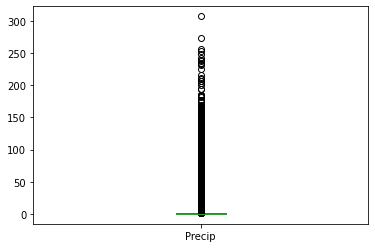

In [42]:
df["Precip"].plot(kind="box")

<AxesSubplot:>

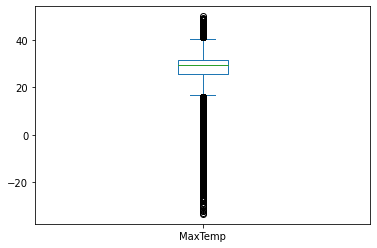

In [43]:
df["MaxTemp"].plot(kind="box")

<AxesSubplot:ylabel='Density'>

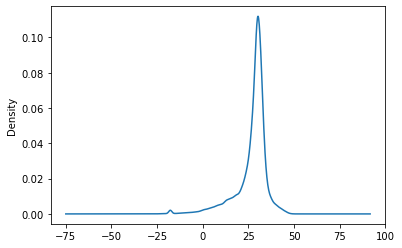

In [44]:
df["MaxTemp"].plot(kind="kde")

<AxesSubplot:ylabel='Frequency'>

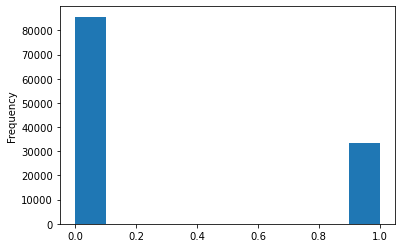

In [45]:
df["Thunder"].plot(kind="hist")

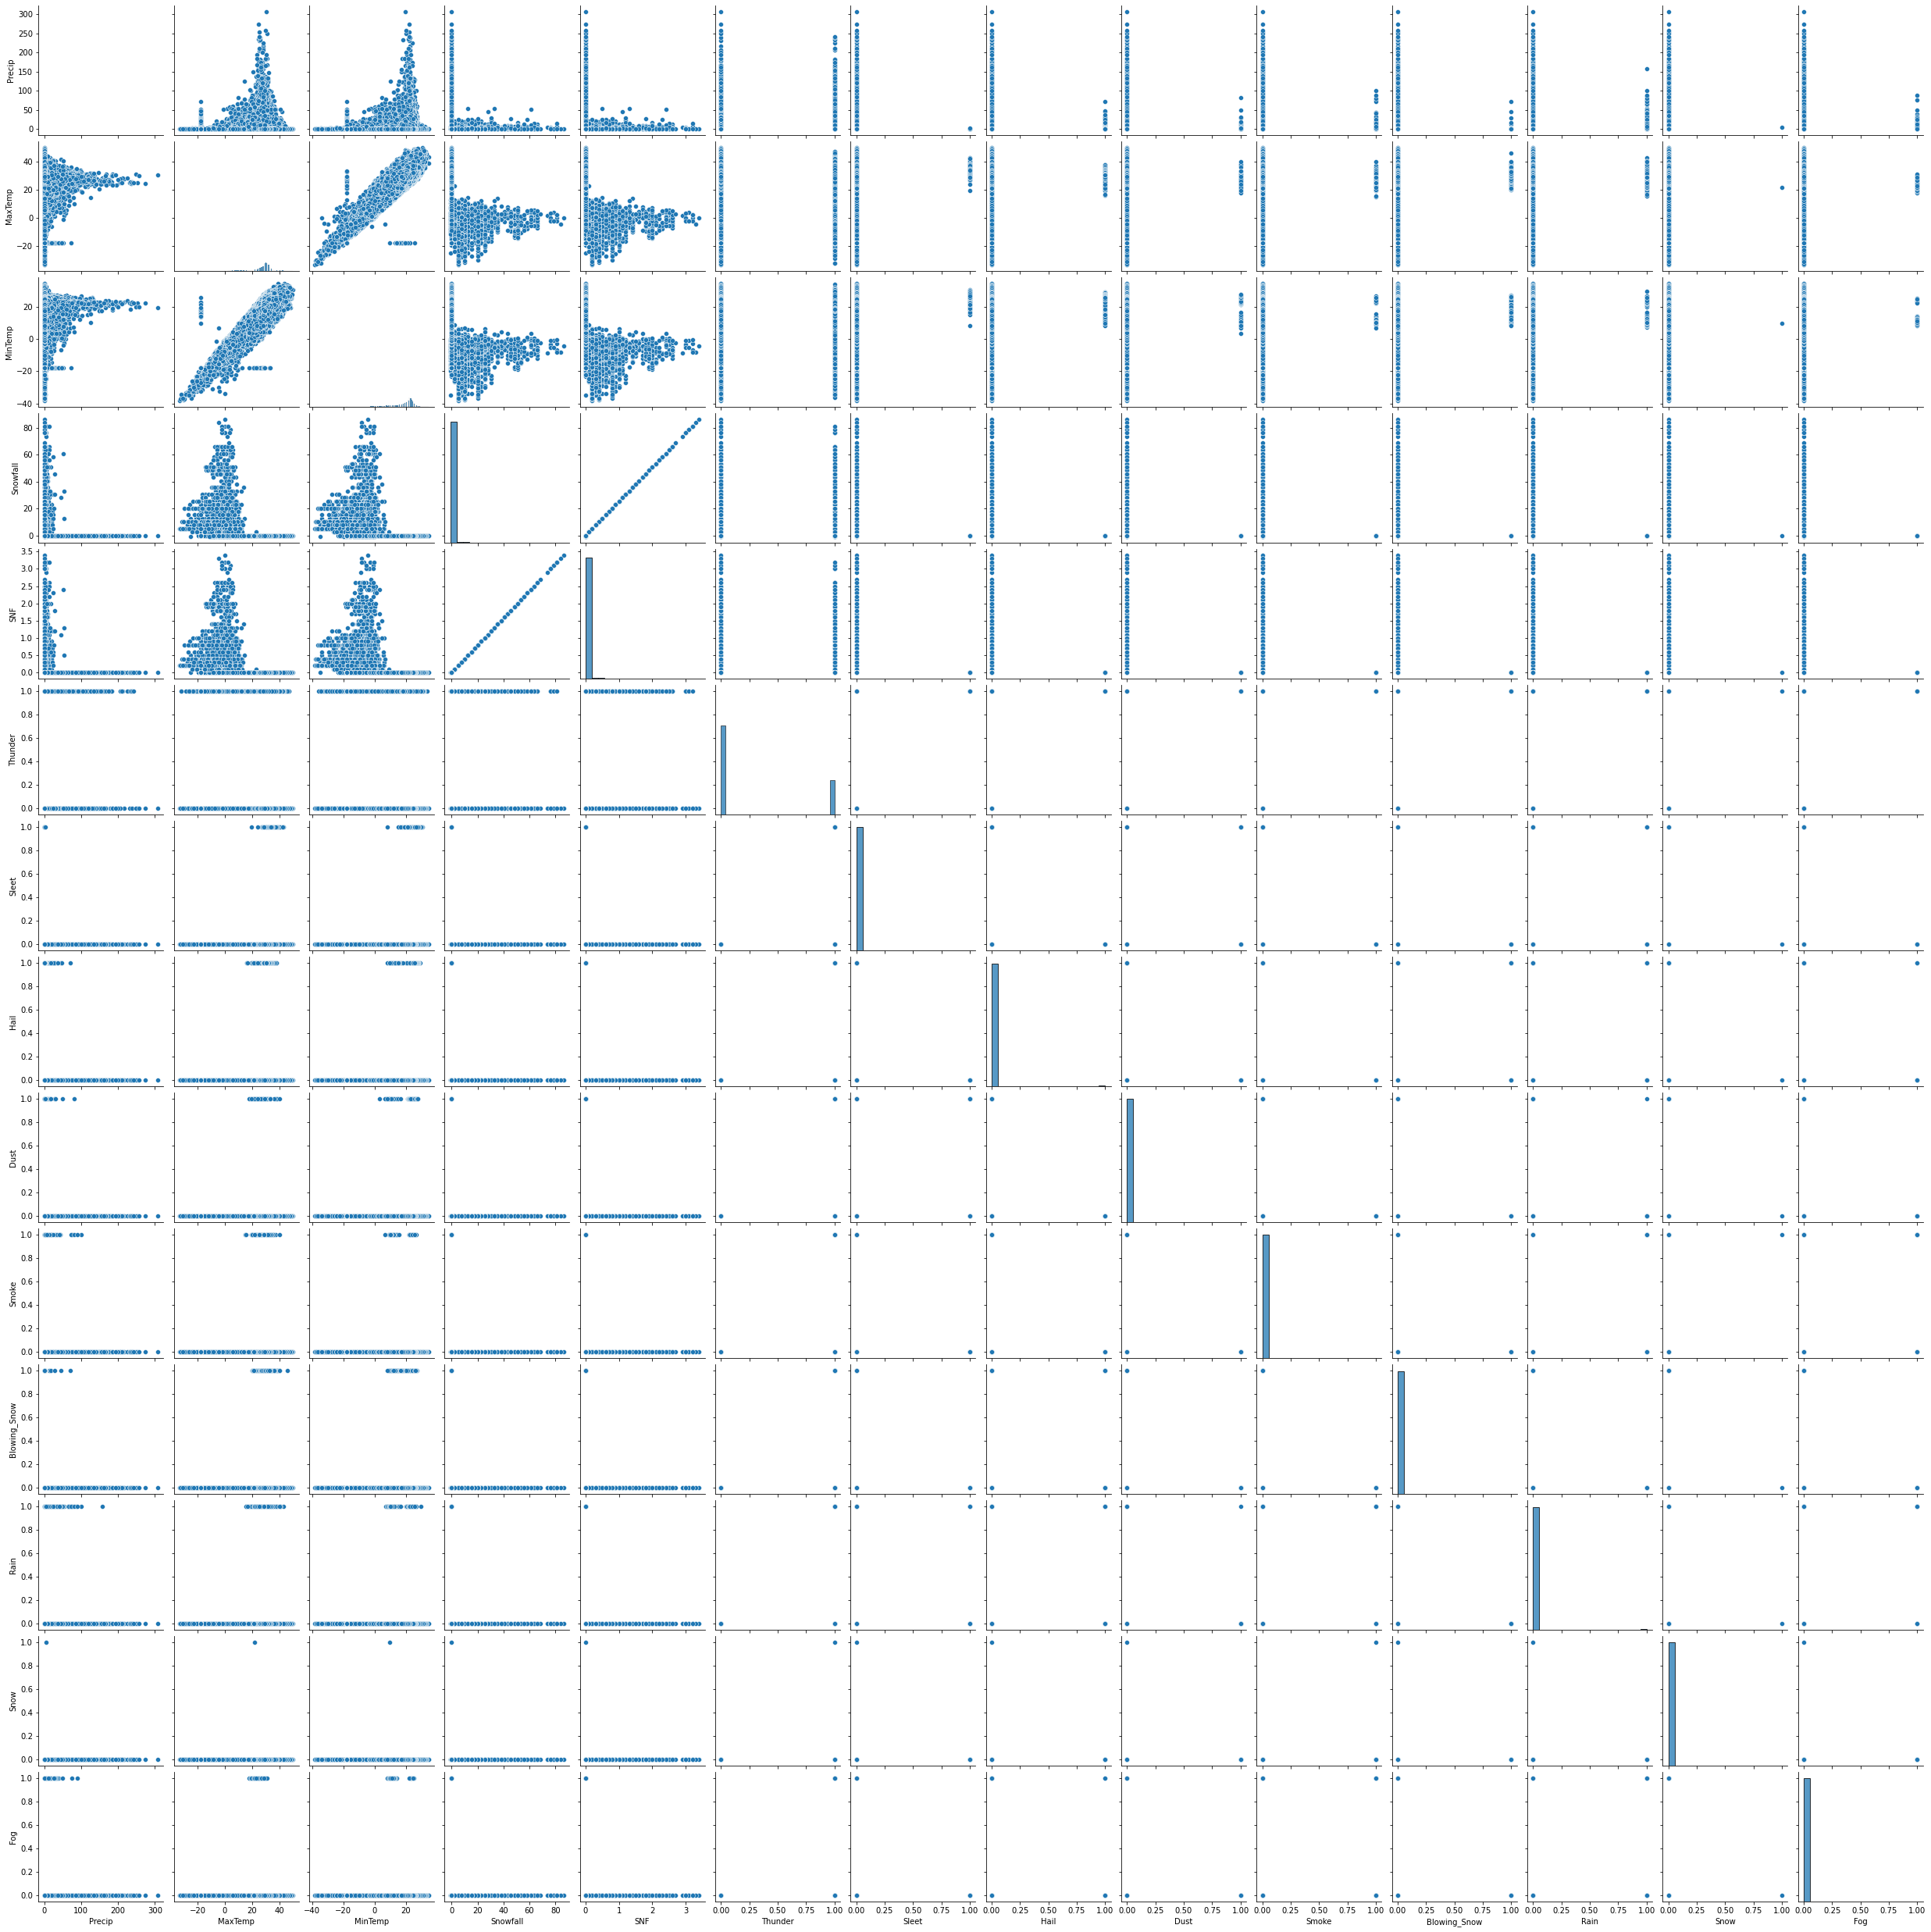

In [46]:
sns.pairplot(df.drop(columns=["STA"]))

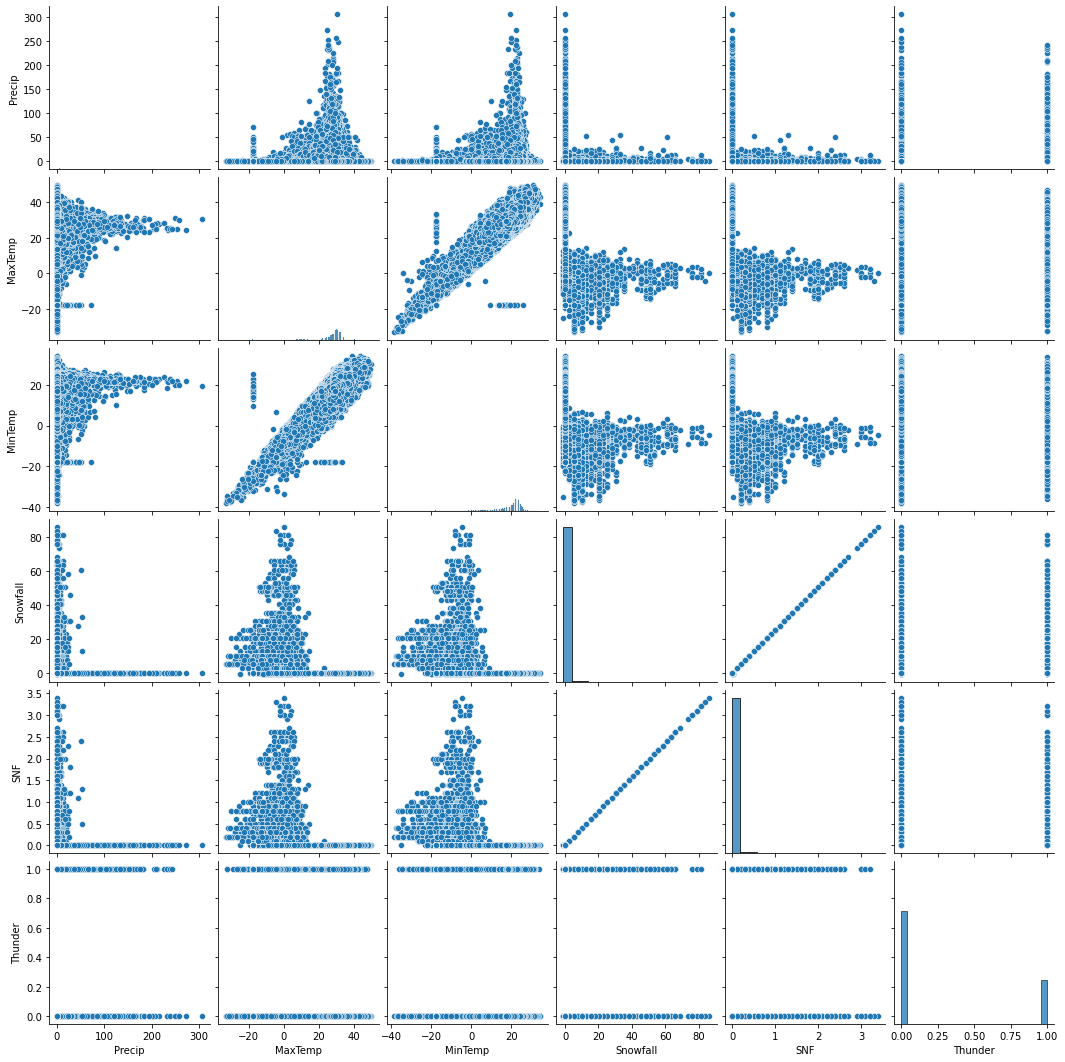

In [47]:
sns.pairplot(df[[
    "Precip",
    "MaxTemp",
    "MinTemp",
    "Snowfall",
    "SNF",
    "Thunder"
]])

In [48]:
DROPPABLE_COLS += ["SNF"] # c'è un altro duplicato che era sfuggito

df = df.drop(columns=DROPPABLE_COLS, errors="ignore")

In [49]:
# clean wrong data (MinTemp > MaxTemp)
df[df["MinTemp"] > df["MaxTemp"]].shape

(32, 15)

In [50]:
df[df["MinTemp"] > df["MaxTemp"]]

,STA,Date,Precip,MaxTemp,MinTemp,Snowfall,Thunder,Sleet,Hail,Dust,Smoke,Blowing_Snow,Rain,Snow,Fog
28773,11704,1945-01-01,0.010,-17.777778,16.666667,0.00,1,0,0,0,0,0,0,0,0
28774,11704,1945-01-02,0.000,-17.777778,15.555556,0.00,0,0,0,0,0,0,0,0,0
28775,11704,1945-01-03,1.524,-17.777778,17.777778,0.00,1,0,0,0,0,0,0,0,0
28776,11704,1945-01-04,0.508,-17.777778,16.111111,0.00,1,0,0,0,0,0,0,0,0
28777,11704,1945-01-05,0.000,-17.777778,17.777778,0.00,1,0,0,0,0,0,0,0,0
28778,11704,1945-01-06,0.000,-17.777778,15.555556,0.00,0,0,0,0,0,0,0,0,0
28779,11704,1945-01-07,5.080,-17.777778,15.555556,0.00,1,0,0,0,0,0,0,0,0
28780,11704,1945-01-08,0.254,-17.777778,17.777778,0.00,1,0,0,0,0,0,0,0,0
43379,16201,1944-01-22,0.000,-6.111111,-1.666667,5.08,0,0,0,0,0,0,0,0,0
73630,32803,1942-11-11,0.000,-17.777778,18.888889,0.00,0,0,0,0,0,0,0,0,0


In [51]:
df = df.drop(index = df[df["MinTemp"] > df["MaxTemp"]].index)

In [52]:
df.columns

Index(['STA', 'Date', 'Precip', 'MaxTemp', 'MinTemp', 'Snowfall', 'Thunder',
       'Sleet', 'Hail', 'Dust', 'Smoke', 'Blowing_Snow', 'Rain', 'Snow',
       'Fog'],
      dtype='object')

## TRAIN A LINEAR REGRESSION MODEL

Predict MaxTemp, giving MinTemp

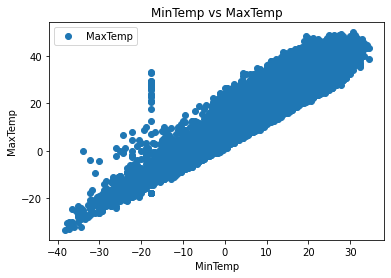

In [53]:
df.plot(x='MinTemp', y='MaxTemp', style='o')  
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

D:\Users\feder\Miniconda3\envs\py39_pbg\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

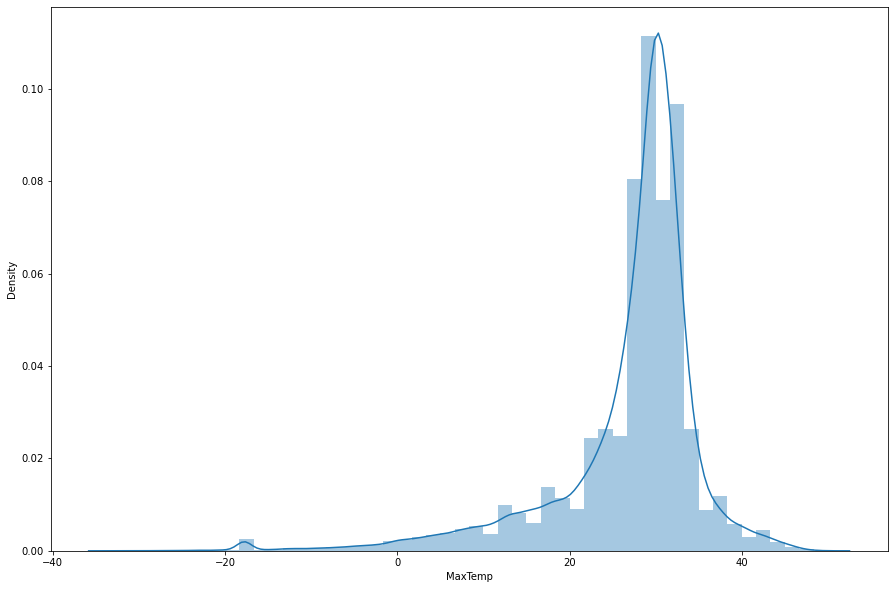

In [54]:
plt.figure(figsize=(15,10))
sns.distplot(df['MaxTemp'])

Our next step is to divide the data into **attributes** and **labels**.

Attributes are the independent variables while labels are dependent variables whose values are to be predicted. 

In our dataset, we only have two columns. We want to predict the MaxTemp depending upon the MinTemp recorded. Therefore our attribute set will consist of the “MinTemp” column which is stored in the X variable, and the label will be the “MaxTemp” column which is stored in y variable.

In [55]:
# target definition
X = df[['MinTemp']]
y = df['MaxTemp']

Next, we split 75% of the data to the training set while 25% of the data to test set using below code.

The test_size variable is where we actually specify the proportion of the test set.

In [56]:
# train / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

After splitting the data into training and testing sets, finally, the time is to train our algorithm. 

In [57]:
# model training
regressor = LinearRegression()  
regressor.fit(X_train, y_train) # training the algorithm

LinearRegression()

### Interpretabilità del modello

As we have discussed that the linear regression model basically finds the best value for the intercept and slope, which results in a line that best fits the data. To see the value of the intercept and slop calculated by the linear regression algorithm for our dataset, execute the following code.

Y = mx + b

In [58]:
#To retrieve the intercept:
print(regressor.intercept_)

10.69018196556203


In [59]:
#For retrieving the slope:
print(regressor.coef_)

[0.91968961]


In [60]:
print("y = %.2f x + %.2f" % (regressor.coef_[0], regressor.intercept_))

y = 0.92 x + 10.69


This means that for every one unit of change in Min temperature, the change in the Max temperature is about 0.92%.

### PREDICTIONS

We will use our test data and see how accurately our algorithm is. 

In [61]:
# model evaluation
y_pred = regressor.predict(X_test)

Now compare the actual output values for X_test with the predicted values

In [62]:
res_df = pd.DataFrame({
    'Actual': y_test, 
    'Predicted': y_pred
})

res_df

,Actual,Predicted
47663,9.444444,13.755814
104109,28.888889,30.616790
62150,35.555556,30.105851
67720,22.222222,26.529281
111406,27.777778,33.171483
...,...,...
11496,30.000000,32.149606
115901,29.444444,26.018342
30633,21.111111,20.908955
93359,12.777778,17.843323


### Visualize predictions

We can also visualize comparison result as a bar graph using the below script :

Note: As the number of records is huge, for representation purpose I’m taking just 25 records.

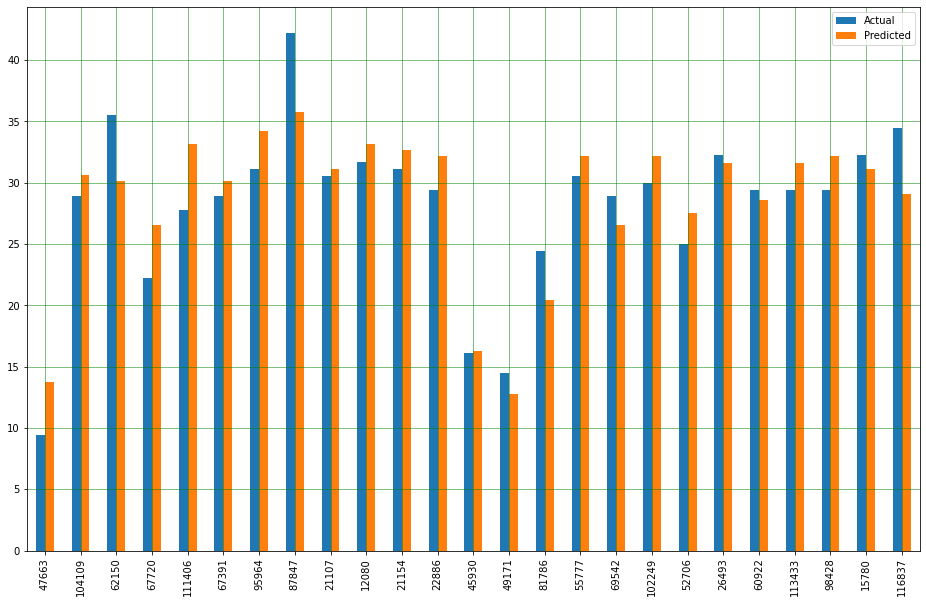

In [63]:
df1 = res_df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Though our model is not very precise, the predicted percentages are close to the actual ones.

Let's plot our straight line with the test data :

In [64]:
res_df["X"] = X_test
res_df.head()

,Actual,Predicted,X
47663,9.444444,13.755814,3.333333
104109,28.888889,30.616790,21.666667
62150,35.555556,30.105851,21.111111
67720,22.222222,26.529281,17.222222
111406,27.777778,33.171483,24.444444


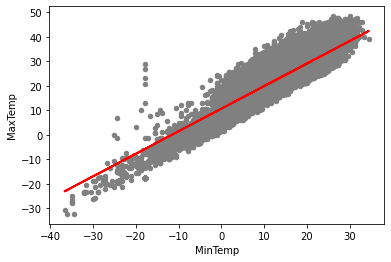

In [65]:
ax = res_df.plot(x="X", y="Actual", kind="scatter", color='gray')
ax.set_xlabel("MinTemp")
ax.set_ylabel("MaxTemp")
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

### MODEL EVALUATION

Luckily, we don’t have to perform these calculations manually. The Scikit-Learn library comes with pre-built functions that can be used to find out these values for us.

##### METRIC: RMSE

<div style="max-width: 50%;">
![](./img/rmse.jpg)
</div>

Let’s find the values for these metrics using our test data.

In [66]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.1556147526746083
Mean Squared Error: 16.682800139220742
Root Mean Squared Error: 4.084458365465456


You can see that the value of root mean squared error is > 4.
This means that our algorithm was not very accurate but can still make reasonably good predictions.

## MULTIPLE LINEAR REGRESSION EXAMPLE

In [67]:
# Individuo alcune colonne su cui addestrare il modello
TRAIN_COLS = [
    'Precip',
    'MaxTemp', 
    'MinTemp',
#     'Thunder', # Tuoni
#     'Hail', # grandine
#     'Dust', # Polvere o sabbia
#     'Smoke', # Fumo o foschia
#     'Rain', # Pioggia
#     'Fog' # Nebbia
]

# TARGET DEFINITION
TARGET_COL = "Snowfall"

In [68]:
X = df[TRAIN_COLS]
y = df[TARGET_COL]

In [69]:
# train / test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [70]:
X_train.shape, X_test.shape

((89256, 3), (29752, 3))

In [71]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) # training the algorithm

LinearRegression()

In [72]:
#To retrieve the intercept:
print(regressor.intercept_)

2.733225069305914


In [73]:
#For retrieving the slope:
print(regressor.coef_)

[-0.00035927 -0.07148208 -0.0311301 ]


In [74]:
# model evaluation
y_pred = regressor.predict(X_test)

y_pred = np.clip(y_pred, 0, y_pred.max())

In [75]:
res_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
res_df.head()

,Actual,Predicted
47663,0.0,1.954350
104109,0.0,0.000000
62150,0.0,0.000000
67720,0.0,0.608605
111406,0.0,0.000000


In [76]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5027138929515093
Mean Squared Error: 5.78684434261131
Root Mean Squared Error: 2.4055860705057532


**We should iterate on feature selection / feature engineering** 

In [77]:
res_df

,Actual,Predicted
47663,0.0,1.954350
104109,0.0,0.000000
62150,0.0,0.000000
67720,0.0,0.608605
111406,0.0,0.000000
...,...,...
11496,0.0,0.000000
115901,0.0,0.109640
30633,0.0,0.878269
93359,0.0,1.577716


In [78]:
res_df[res_df["Actual"]>0]

,Actual,Predicted
46248,12.70,2.856211
47534,30.48,2.996123
46059,2.54,2.204791
49341,5.08,2.925386
48936,15.24,4.016836
...,...,...
43779,22.86,3.281705
48921,22.86,3.572866
49406,10.16,4.499161
43704,2.54,2.430266


## SAVE THE MODEL

In [79]:
import pickle

In [82]:
TRAINED_MODEL = "../data/trained_model.pkl"

In [83]:
with open(TRAINED_MODEL, "wb") as f:
    pickle.dump(regressor, f)

## MODEL DEPLOYMENT

In [84]:
TRAINED_MODEL = "../data/trained_model.pkl"

with open(TRAINED_MODEL, "rb") as f:
    trained_regressor = pickle.load(f)

In [85]:
trained_regressor.intercept_, trained_regressor.coef_

(2.733225069305914, array([-0.00035927, -0.07148208, -0.0311301 ]))

In [86]:
def predict(precip, max_temp, min_temp):
    df = pd.DataFrame([{
        'Precip': precip,
        'MaxTemp': max_temp, 
        'MinTemp': min_temp
    }])
    
    return trained_regressor.predict(df)

In [87]:
predict(2, 26, 22)

array([0.18911025])